In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') # to mount the drive data into colab cloud and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/ML nishit sir/DBSCAN"

/content/drive/My Drive/ML nishit sir/DBSCAN


In [5]:
dataset=pd.read_csv("KMeans.csv")
print(dataset)
dataset.shape

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


(200, 3)

In [6]:
X=dataset.iloc[:,[1,2]].values

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [8]:
X=StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [9]:
ns=3

In [10]:
nearestneighbours=NearestNeighbors(3).fit(X)

In [11]:
distances,indices = nearestneighbours.kneighbors(X)

In [12]:
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,   8],
       [  3,   5,  13],
       [  4,   0,  16],
       [  5,   3,  13],
       [  6,   2,   8],
       [  7,  11,  19],
       [  8,   6,   2],
       [  9,   5,  21],
       [ 10,  14,  12],
       [ 11,  19,   7],
       [ 12,  10,  14],
       [ 13,  15,   5],
       [ 14,  10,  12],
       [ 15,  13,   5],
       [ 16,  20,  18],
       [ 17,   9,  21],
       [ 18,  26,  20],
       [ 19,  11,   7],
       [ 20,  16,  26],
       [ 21,  23,   9],
       [ 22,  30,   8],
       [ 23,  21,  31],
       [ 24,  34,  36],
       [ 25,  35,  29],
       [ 26,  28,  20],
       [ 27,  17,  43],
       [ 28,  26,  18],
       [ 29,  25,  33],
       [ 30,  32,  22],
       [ 31,  37,  23],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  36,  24],
       [ 35,  25,  29],
       [ 36,  34,  24],
       [ 37,  39,  31],
       [ 38,  44,  40],
       [ 39,  37,  31],
       [ 40,  42,  44],
       [ 41,  33

In [13]:
distances

array([[0.        , 0.08564307, 0.27669913],
       [0.        , 0.15990848, 0.20603662],
       [0.        , 0.07633886, 0.16332841],
       [0.        , 0.0544428 , 0.15267772],
       [0.        , 0.08564307, 0.24695814],
       [0.        , 0.0544428 , 0.12091014],
       [0.        , 0.07633886, 0.12255989],
       [0.        , 0.19782504, 0.24604156],
       [0.        , 0.12255989, 0.16332841],
       [0.        , 0.17303595, 0.19475561],
       [0.        , 0.0544428 , 0.0544428 ],
       [0.        , 0.15753602, 0.19782504],
       [0.        , 0.0544428 , 0.07764312],
       [0.        , 0.07764312, 0.12091014],
       [0.        , 0.0544428 , 0.07764312],
       [0.        , 0.07764312, 0.16332841],
       [0.        , 0.11450829, 0.24511979],
       [0.        , 0.24511979, 0.29489102],
       [0.        , 0.22357696, 0.236036  ],
       [0.        , 0.15753602, 0.24604156],
       [0.        , 0.11450829, 0.19202736],
       [0.        , 0.03816943, 0.19475561],
       [0.

In [14]:
distanceDec=sorted(distances[:,2],reverse=True)

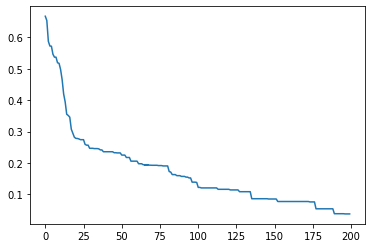

In [15]:
plt.plot(indices[:,0],distanceDec)

In [16]:
db=DBSCAN(eps=0.3,min_samples=5).fit(X)

In [17]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [18]:
labels=db.labels_  #-1 is noise points

In [19]:
db.core_sample_indices_

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165,
       166, 170, 172, 173, 174, 176, 178, 179])

In [20]:
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)

In [21]:
core_samples_mask[db.core_sample_indices_]=True

In [22]:
core_samples_mask

array([False,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [23]:
n_clusers_=len(set(labels))-1
n_clusers_

7

In [24]:
unique_labels=set(labels)

In [25]:
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]

In [26]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [27]:
#core_samples_mask: Core datapoints

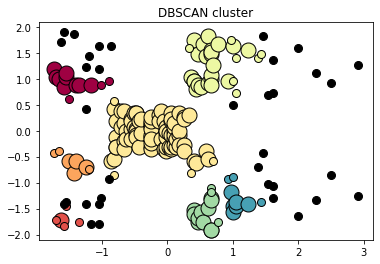

In [28]:

#core_sample_mask : Core Data Points
for k,col in zip(unique_labels,colors):
    if(k==-1):
        col=[0,0,0,1]       #for noise Points
    noise_mask=(labels==k)
    y=X[core_samples_mask & noise_mask]

    plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k', markersize=15)    #core data points

    y=X[~core_samples_mask & noise_mask]

    plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k', markersize=8)    #boundary datapoint
plt.title("DBSCAN cluster")

plt.show()
